<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Présentation:" data-toc-modified-id="Présentation:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Présentation:</a></span><ul class="toc-item"><li><span><a href="#Mission" data-toc-modified-id="Mission-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mission</a></span></li></ul></li><li><span><a href="#Importation-des-librairies" data-toc-modified-id="Importation-des-librairies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importation des librairies</a></span></li><li><span><a href="#Les-fonctions" data-toc-modified-id="Les-fonctions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Les fonctions</a></span></li><li><span><a href="#Importation-et-Exploration-du-jeu-de-données" data-toc-modified-id="Importation-et-Exploration-du-jeu-de-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importation et Exploration du jeu de données</a></span><ul class="toc-item"><li><span><a href="#verification-du-jeux-de-données" data-toc-modified-id="verification-du-jeux-de-données-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>verification du jeux de données</a></span></li><li><span><a href="#Identification-et-traitement-des-valeurs-manquantes" data-toc-modified-id="Identification-et-traitement-des-valeurs-manquantes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Identification et traitement des valeurs manquantes</a></span></li><li><span><a href="#Sauvgarder-le-nouveau-jeu-de-données" data-toc-modified-id="Sauvgarder-le-nouveau-jeu-de-données-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sauvgarder le nouveau jeu de données</a></span></li></ul></li></ul></div>

# Présentation: 

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

Le jeu de données comprend les informations suivantes:

Les informations générales sur la fiche du produit : nom, date de modification, etc.

Un ensemble de tags : catégorie du produit, localisation, origine, etc.

Les ingrédients composant les produits et leurs additifs éventuels.

Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

La provenance du jeu de données est Open Food Facts.

## Mission

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.

Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour l idée d’application.

Nettoyage des données en :

mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.

Automatisant ces traitements pour éviter de répéter ces opérations

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Importation des librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline




# Les fonctions

In [2]:
def nbr_lignes(data):
       return len(data)
    
def nbr_columns(data):
    return len(data.columns)

#fonction qui concerne les lignes dupliquées + % 
def count_duplicates_rows(data):    
    return len(data)-len(data.drop_duplicates())

def count_duplicates_rows_percent(data):
    return count_duplicates_rows(data)/nbr_lignes(data)

# fonction qui excute une trame de données en entrée et renvoie le nombre de cellules manquantes + %
def cellules_manquantes(data):
    return data.isna().sum().sum()

#fonction prenant une dataframe en entrée et renvoie le pourcentage de cellules manquantes
def cellules_manquantes_percent(data):
    return data.isna().sum().sum()/(data.size)

# fonction qui renvoie le nom de la variable dans l’espace de noms 
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

#fonction qui renvoi les variables en dataframe
def dataset_columns(data):
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Columns : {}'.format(data.columns.values))


# Fonction permattant de calculer la somme et le pourcentage des valeurs manquantes 

def missing_values_1(df):

    total = df.isnull().sum()   # Calcul du total des valeurs manquantes
    percent = round(df.isnull().sum()/df.isnull().count()*100,1) # Calcul le pourcentage des valeurs arrondi
      
    missing_data = pd.concat([total,percent],axis =1, keys=['Total','Ratio_of_NA(%)']) 
    type=pd.DataFrame(df[missing_data.index].dtypes, columns=['Types'])
    missing_data=pd.concat([missing_data,type],axis=1)
    missing_data=missing_data.sort_values('Total',ascending=False)
    missing_data.head(15)
    print( "le total des valeurs manquantes est", total.sum()) #Afficher la somme total des valeurs manquantes
    print(percent) #afficher le poucentage
    print(missing_data.head())
    print()
    print(set(missing_data['Types']))
    print()
    print("---Categorical columns---")
    
    print(missing_data[missing_data['Types']=="object"].index) # Colonnes ayant des variables qualitatives
    print()
    print("---Numerical columns----")
    print(missing_data[missing_data['Types'] !="object"].index)  # Colonnes ayant des variables quantitatives
    
    
# fonction qui prend le trame de données en entrée et en sortie un cadre de données contenant des variables, le nombre de valeurs manquantes et le % de valeurs manquantes'''
def missing_values(data):
    summary = pd.DataFrame(columns=['Variable name', 'Missing values', '% Missing'])
    summary['Variable name']=data.columns
    missing = list()
    percent_missing = list()
    for var in data.columns:
        nb_missing = cellules_manquantes(data[var])
        pc_missing = cellules_manquantes_percent(data[var])
        missing.append(nb_missing)
        percent_missing.append(pc_missing)
    summary['Missing values'] = list(missing)
    summary['% Missing'] = list(percent_missing)
    return summary

# fonction qui génère la sortie de la méthode columns_type dans le fichier csv 
def output_dataframe_variable_types(data):
   
    summary = columns_type(data)
    summary.to_csv('output_dataframe_{}_variable_types.csv'.format(namestr(data, globals())),sep=',', index = False)
    

# fonction vue d'ensemble de la DataFrame: résumé contenant nombre de lignes, de colonnes, de cellules manquantes et de lignes en double
   
def data_set_overview(data):    
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Nbr de variables : {}'.format(nbr_columns(data)))
    print('Nbr d observations : {}'.format(nbr_lignes(data)))
    print('cellules_manquantes : {}'.format(cellules_manquantes(data)))
    print('cellules_manquantes in % : {:.2%}'.format(cellules_manquantes_percent(data)))
    print('Duplicate rows : {}'.format(count_duplicates_rows(data)))
    print('Duplicate rows in % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    

 
  
##Fonction prenant une trame de données en entrée et renvoyant un résumé contenant nom de la variable, type
def columns_type(data): 
    
    df = pd.DataFrame(data.dtypes)[0]
    summary = pd.DataFrame(columns=['noms Variables', 'type Variable'])
    summary['noms Variables']=data.columns
    summary['type Variable']=list(df)
    return summary

   
def drop_unpopulated_column(data,limit):
    summary = missing_values(data)
    logical = list()
    for row in summary.iterrows():
        if float(row[1]['% Missing'])>float(limit):
            # to be dropped
            print('Dropping variable {} from  {} with % missing {}'.format(row[1]['Variable name'],namestr(data, globals()),round(float(row[1]['% Missing']),2)))
            logical.append(False)
        else:
            #kept
            logical.append(True)
        
    columns_to_keep = summary[logical]['Variable name']
    
    return data[columns_to_keep]


#Crée rapidement des DataFrame
def make_df(columns, index):
    
    data = {c: [str(c) + str(i) for i in index]
            for c in cols}
    return pd.DataFrame(data, index)

def search_componant(df, suffix=None):
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant



# Importation et Exploration du jeu de données

In [3]:
df1=pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

C:\Users\SAYYOU MVHS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## verification du jeux de données

In [5]:
df1.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


In [6]:
df1.tail(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [8]:
# remplacement des strings par nan
df1.replace("?", np.nan, inplace=True)
df1.replace(";", np.nan, inplace=True)
df1.replace(".", np.nan, inplace=True)
df1.replace(",", np.nan, inplace=True)

In [9]:
df1.replace([np.inf, -np.inf], 0, inplace=True)
df1.replace([np.inf, -np.inf], 0, inplace=True)

In [10]:
data_set_overview(df1)

--------------------------------------------------------------------------
Data : ['df1']
Nbr de variables : 162
Nbr d observations : 320772
cellules_manquantes : 39608650
cellules_manquantes in % : 76.22%
Duplicate rows : 0
Duplicate rows in % : 0.00%


In [11]:
df1.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

## Identification et traitement des valeurs manquantes

In [12]:
missing_values_1(df1)

le total des valeurs manquantes est 39608650
code                         0.0
url                          0.0
creator                      0.0
created_t                    0.0
created_datetime             0.0
                           ...  
carbon-footprint_100g       99.9
nutrition-score-fr_100g     31.0
nutrition-score-uk_100g     31.0
glycemic-index_100g        100.0
water-hardness_100g        100.0
Length: 162, dtype: float64
                                        Total  Ratio_of_NA(%)    Types
water-hardness_100g                    320772           100.0  float64
no_nutriments                          320772           100.0  float64
ingredients_that_may_be_from_palm_oil  320772           100.0  float64
nutrition_grade_uk                     320772           100.0  float64
nervonic-acid_100g                     320772           100.0  float64

{dtype('float64'), dtype('O')}

---Categorical columns---
Index(['allergens_fr', 'cities', 'ingredients_from_palm_oil_tags',
       'ingr

<AxesSubplot:title={'center':'Visualisation des valeurs manquantes'}>

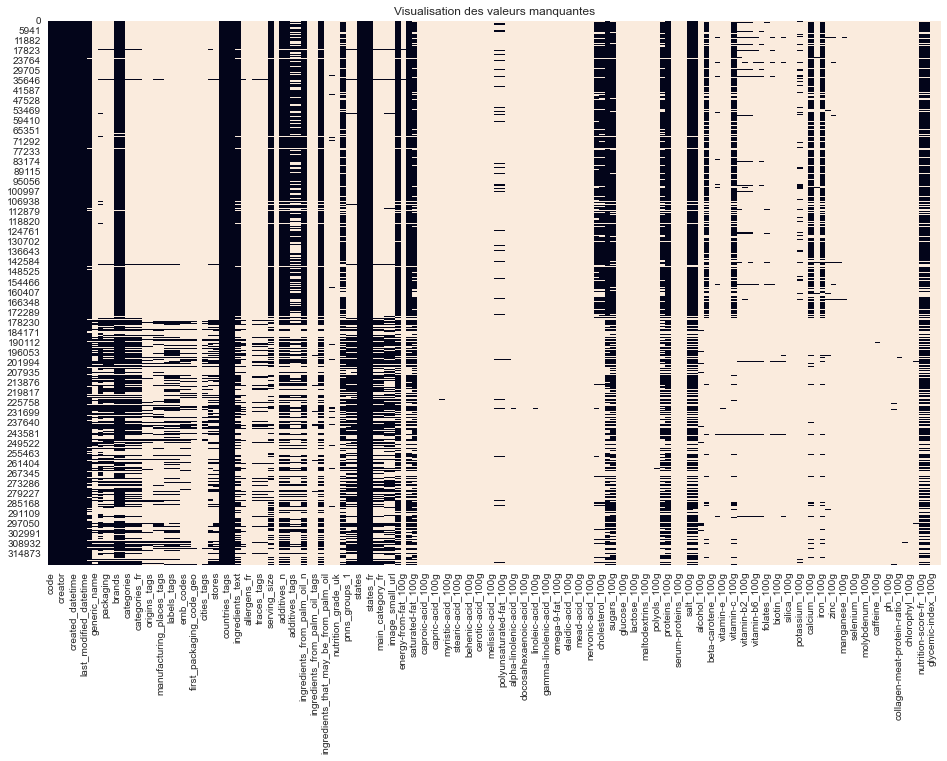

In [66]:
# visialisation par Whitegrid des données manquantes
sns.set_style('whitegrid')
plt.figure(figsize=(16,10)) #Réglage de la taille
plt.title("Visualisation des valeurs manquantes") #titre 
sns.heatmap(df1.isnull(), cbar=False) #Affichage de la carte thermique

In [13]:
# % des données manquantes par variables ( années) arrondi > 75%
percent=round(df1.isnull().sum()/df1.isnull().count()*100,2)
percent_selection =percent[percent> 75.0]
percent_selection=pd.DataFrame(percent_selection, columns=['percent'])
percent_selection
    

,percent
generic_name,83.54
packaging,75.39
packaging_tags,75.38
origins,93.09
origins_tags,93.09
...,...
cocoa_100g,99.70
chlorophyl_100g,100.00
carbon-footprint_100g,99.92
glycemic-index_100g,100.00


In [14]:
#suppression des variables dont les Valeurs Manquantes dépassent 75% en faisant appel à la fonction definition drop unpopulated column(data,limit)
df1_first_sel=drop_unpopulated_column(df1,0.75)


Dropping variable generic_name from  ['df1'] with % missing 0.84
Dropping variable packaging from  ['df1'] with % missing 0.75
Dropping variable packaging_tags from  ['df1'] with % missing 0.75
Dropping variable origins from  ['df1'] with % missing 0.93
Dropping variable origins_tags from  ['df1'] with % missing 0.93
Dropping variable manufacturing_places from  ['df1'] with % missing 0.89
Dropping variable manufacturing_places_tags from  ['df1'] with % missing 0.89
Dropping variable labels from  ['df1'] with % missing 0.85
Dropping variable labels_tags from  ['df1'] with % missing 0.85
Dropping variable labels_fr from  ['df1'] with % missing 0.85
Dropping variable emb_codes from  ['df1'] with % missing 0.91
Dropping variable emb_codes_tags from  ['df1'] with % missing 0.91
Dropping variable first_packaging_code_geo from  ['df1'] with % missing 0.94
Dropping variable cities from  ['df1'] with % missing 1.0
Dropping variable cities_tags from  ['df1'] with % missing 0.94
Dropping variable

In [15]:
# supression des lignes 'Unknown'
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_1 != 'unknown'] # supression de des lignes Unknown

In [17]:
# supression des colonnes qui ne rentrent pas dans l'objectif à atteindre
df1_first_sel.drop(df1_first_sel.columns[[0,1,2,3,4,5,6,]], axis=1, inplace=True)
df1_first_sel.drop(['main_category_fr', 'main_category','serving_size','ingredients_text','additives_fr',
                    'states_fr','quantity','brands','main_category_fr','brands_tags','additives_n','additives',
                    'additives_tags','countries','countries_tags','countries_fr','states','states_tags',
                    'nutrition-score-uk_100g'], axis=1, inplace=True)
df1_first_sel.drop(search_componant(df1_first_sel,'categories'), axis=1, inplace=True)

<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

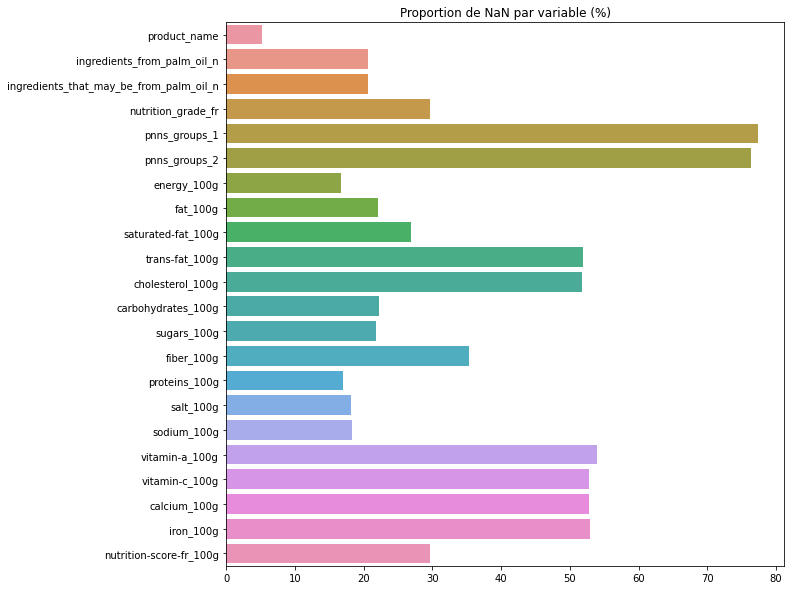

In [18]:
# Visualisation des % NaN par variables
percent = round(df1_first_sel.isnull().sum()/df1_first_sel.isnull().count()*100,1) # Calcul le pourcentage des valeurs arrondi
plt.figure(figsize=(10,10))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x= percent.values, y= percent.index)

In [19]:
df1_first_sel.dropna(subset=['pnns_groups_1'], inplace=True)

In [20]:
df1_first_sel['pnns_groups_1'].value_counts().to_frame()

,pnns_groups_1
Sugary snacks,12368
Beverages,9033
Milk and dairy products,8825
Cereals and potatoes,8442
Fish Meat Eggs,8041
Composite foods,6747
Fruits and vegetables,5908
Fat and sauces,5216
Salty snacks,2809


In [16]:
# supression des valeurs redandantes
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_1 != 'cereals-and-potatoes']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_1 != 'salty-snacks']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_1 != 'fruits-and-vegetables']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_1 != 'sugary-snacks']

In [21]:
df1_first_sel.dropna(subset=['pnns_groups_2'], inplace=True)

In [22]:
df1_first_sel['pnns_groups_2'].value_counts().to_frame()

,pnns_groups_2
One-dish meals,5546
Sweets,4698
Biscuits and cakes,4561
Non-sugared beverages,4302
Cereals,4106
Cheese,4024
Dressings and sauces,3602
Milk and yogurt,3297
Processed meat,3247
Chocolate products,3109


In [23]:
# supression des valeurs redandantes
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_2 != 'nuts']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_2 != 'fruits']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_2 != 'cereals']
df1_first_sel = df1_first_sel[df1_first_sel.pnns_groups_2 != 'legumes']

In [24]:
df1_first_sel.dropna(subset=['nutrition-score-fr_100g'], inplace=True)

In [25]:
df1_second_sel=df1_first_sel

In [26]:
 missing_values_1(df1_second_sel)

le total des valeurs manquantes est 320802
product_name                                0.5
ingredients_from_palm_oil_n                10.3
ingredients_that_may_be_from_palm_oil_n    10.3
nutrition_grade_fr                          0.0
pnns_groups_1                               0.0
pnns_groups_2                               0.0
energy_100g                                 0.2
fat_100g                                    5.0
saturated-fat_100g                          0.2
trans-fat_100g                             97.7
cholesterol_100g                           97.5
carbohydrates_100g                          5.1
sugars_100g                                 0.2
fiber_100g                                 36.7
proteins_100g                               0.2
salt_100g                                   0.2
sodium_100g                                 0.2
vitamin-a_100g                             97.3
vitamin-c_100g                             96.0
calcium_100g                               93

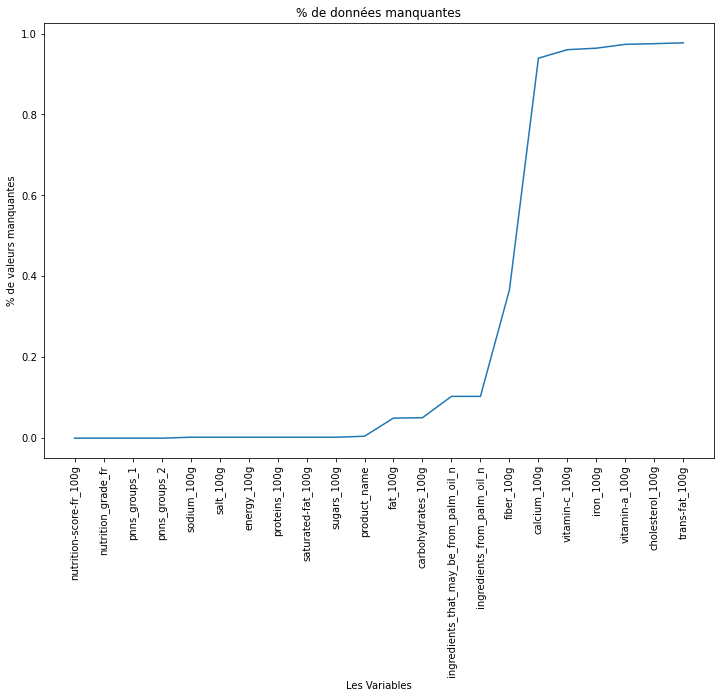

In [27]:
# graphique % des données manquantes apres la suppression des variables à plus de 75% de valeurs manquantes
post_proc_ = missing_values(df1_second_sel).sort_values(by=['% Missing'])
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.title('% de données manquantes')
plt.ylabel('% de valeurs manquantes')
plt.xlabel('Les Variables')
degrees = 90
plt.xticks(rotation=degrees)
plt.plot(post_proc_['Variable name'],post_proc_['% Missing']);

In [28]:
#suppression des variables dont les Valeurs Manquantes dépassent 75% en faisant appel à la fonction definition drop unpopulated column(data,limit)
df1_second_sel=drop_unpopulated_column(df1_second_sel,0.75)

Dropping variable trans-fat_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.98
Dropping variable cholesterol_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.98
Dropping variable vitamin-a_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.97
Dropping variable vitamin-c_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.96
Dropping variable calcium_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.94
Dropping variable iron_100g from  ['df1_first_sel', 'df1_second_sel'] with % missing 0.96


In [29]:
data_ss=df1_second_sel.drop_duplicates(keep=False)


<AxesSubplot:title={'center':'Visualisation des valeurs manquantes'}>

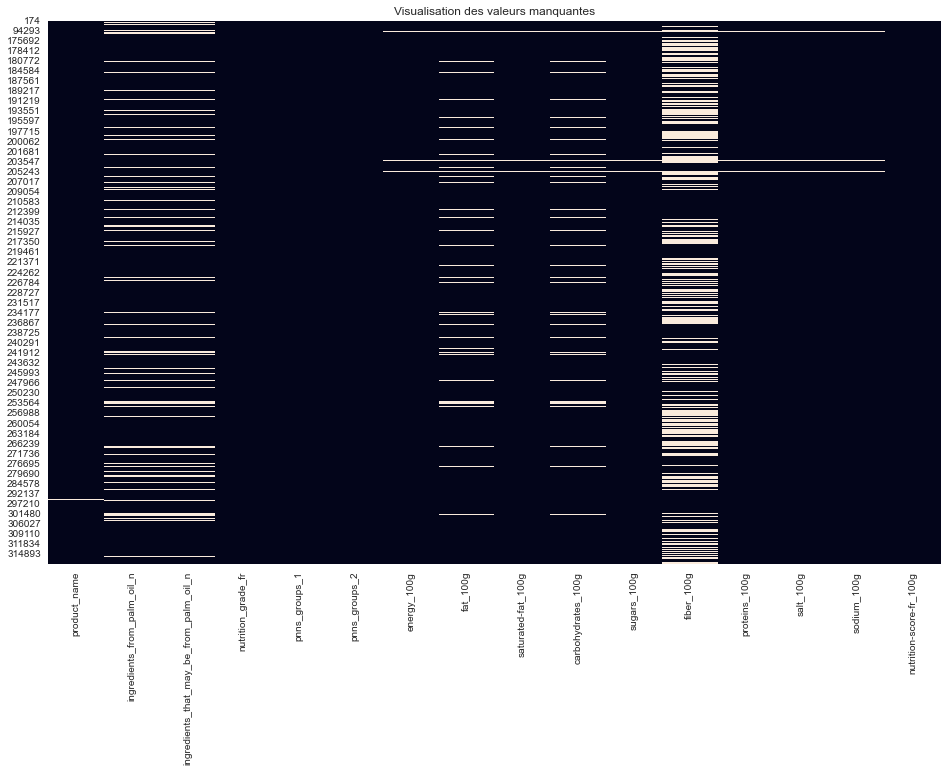

In [131]:
# visialisation par Whitegrid des données manquantes
sns.set_style('whitegrid')
plt.figure(figsize=(16,10)) #Réglage de la taille
plt.title("Visualisation des valeurs manquantes") #titre 
sns.heatmap(df1_second_sel.isnull(), cbar=False) #Affichage de la carte thermique

In [30]:
data_set_overview(data_ss)

--------------------------------------------------------------------------
Data : ['data_ss']
Nbr de variables : 16
Nbr d observations : 47950
cellules_manquantes : 33332
cellules_manquantes in % : 4.34%
Duplicate rows : 0
Duplicate rows in % : 0.00%


## Sauvgarder le nouveau jeu de données

In [31]:
data_ss.to_csv('data_new.csv')